In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/DiplomadoEPM_2019/master/Modulo3/init.py
from init import init; init(force_download=False)

In [1]:
try:
    %tensorflow_version 2.x
    print ("Using TF2 in Google Colab")
except:
    pass
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import *
from local.lib import mlutils
tf.__version__

'2.1.0'

## Observe the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

in [`tensorflow.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) you can find some example datasets

In [2]:
from tensorflow.keras import datasets

In [3]:
(Xtr, ytr), (Xts, yts) = datasets.cifar10.load_data()

Xtr = Xtr/255
Xts = Xts/255
Xtr.shape, ytr.shape, Xts.shape, yts.shape


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
cnames = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "boat", "truck"]

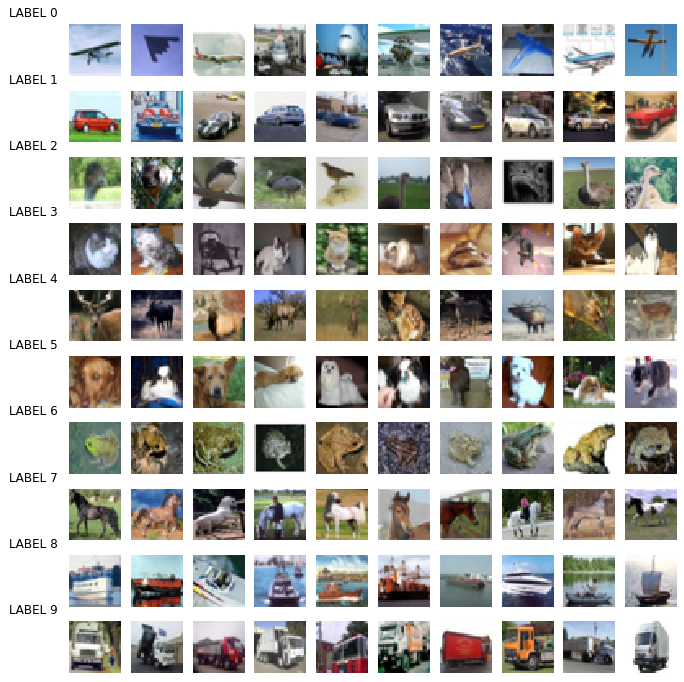

In [5]:
mlutils.show_labeled_image_mosaic(Xtr, ytr[:,0])

we use the functional API to create a simple NN classifier, obtaining reasonable performance

In [6]:
inputs  = tf.keras.layers.Input(shape=Xtr.shape[1:])
layer   = tf.keras.layers.Flatten()(inputs)
layer   = tf.keras.layers.Dense(100, activation="relu")(layer)
layer   = tf.keras.layers.Dense(10, activation="relu")(layer)
outputs = tf.keras.layers.Dense(10, activation="sigmoid")(layer)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam",
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 308,420
Trainable params: 308,420
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(Xtr,ytr[:,0], epochs=10, validation_data=(Xts, yts))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 118us/sample - loss: 2.1809 - accuracy: 0.1577 - val_loss: 2.1011 - val_accuracy: 0.1670
Epoch 2/10
50000/50000 [==============================] - 6s 113us/sample - loss: 2.0523 - accuracy: 0.1816 - val_loss: 2.0006 - val_accuracy: 0.2053
Epoch 3/10
50000/50000 [==============================] - 6s 116us/sample - loss: 1.9137 - accuracy: 0.2642 - val_loss: 1.8279 - val_accuracy: 0.3051
Epoch 4/10
50000/50000 [==============================] - 7s 144us/sample - loss: 1.8039 - accuracy: 0.3256 - val_loss: 1.7749 - val_accuracy: 0.3353
Epoch 5/10
50000/50000 [==============================] - 8s 153us/sample - loss: 1.7499 - accuracy: 0.3553 - val_loss: 1.7411 - val_accuracy: 0.3655
Epoch 6/10
50000/50000 [==============================] - 7s 150us/sample - loss: 1.7053 - accuracy: 0.3783 - val_loss: 1.6781 - val_accuracy: 0.3869
Epoch 7/10
50000/50000 [==========================

observa que nuestro modelo no produce directamente las clases, sino las probabilidades **no normalizadas** para cada clase y cada objeto

In [17]:
probs_ts = model(Xts).numpy()
np.round(probs_ts[:10],2)


array([[0.01, 0.  , 0.04, 0.07, 0.01, 0.07, 0.02, 0.  , 0.02, 0.  ],
       [0.03, 0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.21],
       [0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.01],
       [0.08, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.01],
       [0.  , 0.  , 0.03, 0.02, 0.05, 0.02, 0.04, 0.01, 0.  , 0.  ],
       [0.  , 0.01, 0.01, 0.02, 0.01, 0.01, 0.04, 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.03, 0.  , 0.03, 0.01, 0.  , 0.  , 0.  ],
       [0.04, 0.02, 0.39, 0.07, 0.5 , 0.07, 0.4 , 0.07, 0.01, 0.02],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.03, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.05]],
      dtype=float32)

y tomamos la clase con mayor probabilidad para cada objeto

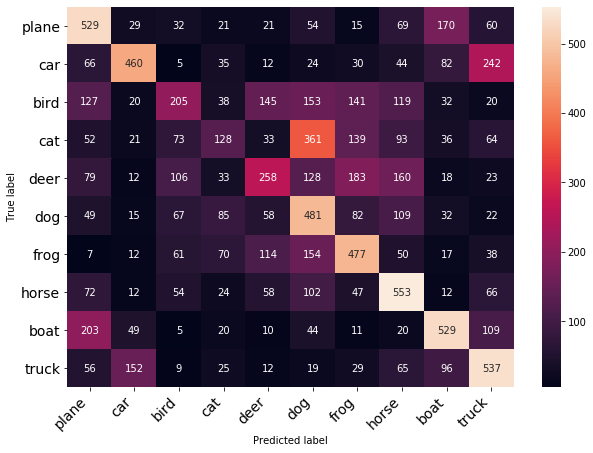

In [20]:
preds_ts = np.argmax(probs_ts, axis=1)
mlutils.print_confusion_matrix(yts, preds_ts, class_names=cnames);

### Asuminos que obtenemos información extra de cada objeto: si es un ser vivo o no

In [23]:
living = [2,3,4,5,6,7]

In [52]:
xtr_liv = np.r_[[i in living for i in ytr]].astype(float).reshape(-1,1)
xts_liv = np.r_[[i in living for i in yts]].astype(float).reshape(-1,1)
print ("pct imgs with living creatures in train %.2f"%np.mean(xtr_liv))
print ("pct imgs with living creatures in test  %.2f"%np.mean(xts_liv))


pct imgs with living creatures in train 0.60
pct imgs with living creatures in test  0.60


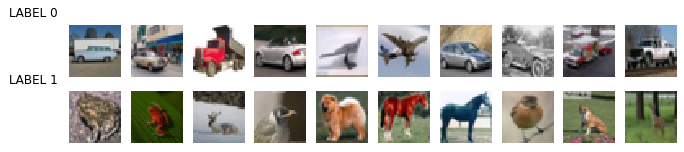

In [53]:
mlutils.show_labeled_image_mosaic(Xtr, xtr_liv[:,0])

### Y usamos esa información como INPUT a nuestra red $\rightarrow$ nuestra red es ahora MULTIMODAL

In [54]:
inputs_img  = tf.keras.layers.Input(shape=Xtr.shape[1:], name="input_imgs")
inputs_liv  = tf.keras.layers.Input(shape=[1], name="input_liv")
layer1   = tf.keras.layers.Flatten(name="flatten_img")(inputs_img)
layer1   = tf.keras.layers.Dense(100, activation="relu", name="layer1_imgs")(layer1)

layer = tf.concat([layer1, inputs_liv], axis=1)
layer   = tf.keras.layers.Dense(10, activation="relu")(layer)
outputs = tf.keras.layers.Dense(10, activation="sigmoid")(layer)

model = tf.keras.Model(inputs=[inputs_img, inputs_liv], outputs=outputs)

model.compile(optimizer="adam",
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_imgs (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
flatten_img (Flatten)           (None, 3072)         0           input_imgs[0][0]                 
__________________________________________________________________________________________________
layer1_imgs (Dense)             (None, 100)          307300      flatten_img[0][0]                
__________________________________________________________________________________________________
input_liv (InputLayer)          [(None, 1)]          0                                            
____________________________________________________________________________________________

In [56]:
model.fit([Xtr, xtr_liv], ytr, epochs=10,
           validation_data=([Xts, xts_liv], yts))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 126us/sample - loss: 2.0798 - accuracy: 0.1864 - val_loss: 1.7814 - val_accuracy: 0.2566
Epoch 2/10
50000/50000 [==============================] - 6s 126us/sample - loss: 1.6017 - accuracy: 0.3286 - val_loss: 1.5172 - val_accuracy: 0.3658
Epoch 3/10
50000/50000 [==============================] - 7s 130us/sample - loss: 1.4822 - accuracy: 0.3733 - val_loss: 1.4481 - val_accuracy: 0.3998
Epoch 4/10
50000/50000 [==============================] - 8s 153us/sample - loss: 1.4342 - accuracy: 0.4017 - val_loss: 1.4269 - val_accuracy: 0.3986
Epoch 5/10
50000/50000 [==============================] - 7s 145us/sample - loss: 1.3939 - accuracy: 0.4222 - val_loss: 1.3838 - val_accuracy: 0.4226
Epoch 6/10
50000/50000 [==============================] - 9s 180us/sample - loss: 1.3628 - accuracy: 0.4376 - val_loss: 1.3389 - val_accuracy: 0.4485
Epoch 7/10
50000/50000 [==========================

que mejoró en la clasificación?


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



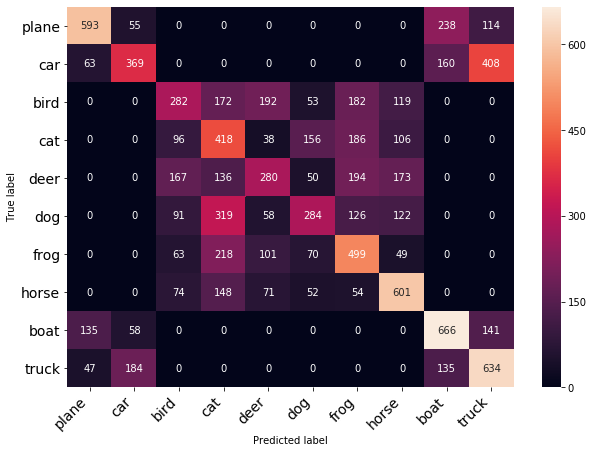

In [57]:
probs_ts = model([Xts, xts_liv]).numpy()
preds_ts = np.argmax(probs_ts, axis=1)
mlutils.print_confusion_matrix(yts, preds_ts, class_names=cnames);